# 01 Heston Simulation

This notebook focuses on simulating Heston dynamics for data generation.

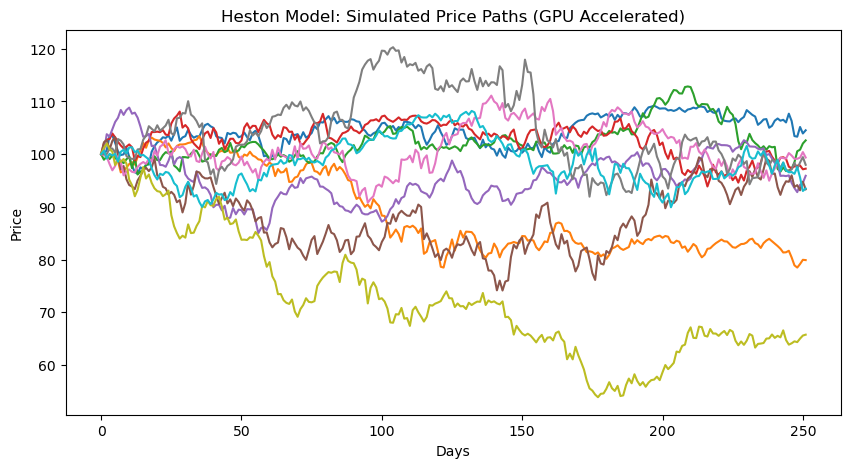

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.physics_engine import HestonSimulator
import matplotlib.pyplot as plt

# 1. 시뮬레이터 초기화 (현실적인 파라미터 설정)
sim = HestonSimulator(mu=0.05, kappa=2.0, theta=0.04, xi=0.3, rho=-0.7)

# 2. 10,000개의 경로 시뮬레이션 (1년치, 일일 단위)
S_paths, v_paths = sim.simulate(S0=100, v0=0.04, T=1.0, dt=1/252, num_paths=10000)

# 3. GPU 데이터를 시각화를 위해 CPU로 가져오기
S_cpu = S_paths.cpu().numpy()

# 4. 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(S_cpu[:10, :].T) # 상위 10개 경로만 출력
plt.title("Heston Model: Simulated Price Paths (GPU Accelerated)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()